<a href="https://colab.research.google.com/github/melquemz/Series_temporais/blob/main/Series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucar - Analisando as vendas


In [1]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 8.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
alucar.shape

(24, 2)

In [5]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum()) # o segundo sum() soma a quantidade de nulos de uma coluna com a outra

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
print(sns.__version__)

0.9.0


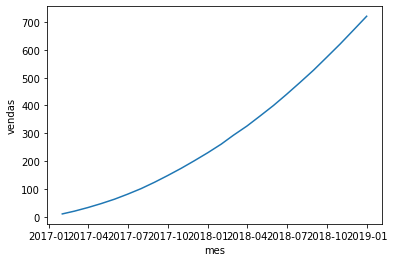

In [9]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

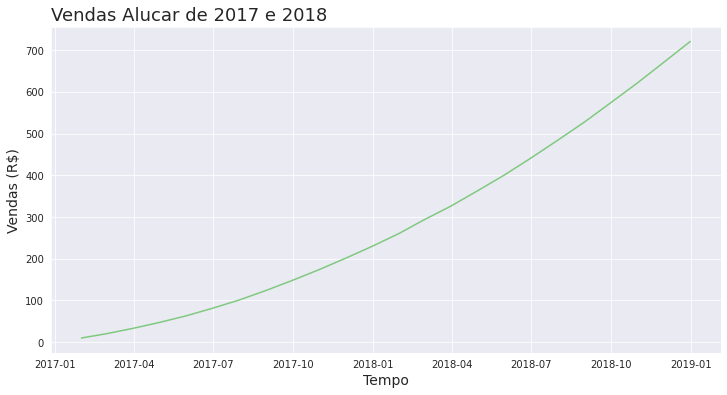

In [10]:
sns.set_palette('Accent') #uma paleta de cor diferente
sns.set_style('darkgrid') #uma marcacao de linha
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar) # quando atribuimos o grafico a uma variavel, aquele titulo indesejado fica na variavel
ax.figure.set_size_inches(12, 6) #aumentar o tamanho do grafico 
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14) #muda o nome da label x e o seu tamanho
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax #para tira a messaguem indesejada que tava aparecendo antes do titulo

# Decomposição e autocorrelação

In [11]:
alucar['aumento'] = alucar[['vendas']].diff() #o diff vai fazer a soma da venda atual com a venda anterior
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [12]:
def plotar (titulo, labelx, labely, x, y, dataset): #colocar todo o codigo em uma funcao para nao precisar ficar escrevendo ele toda vez que for plot algo
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

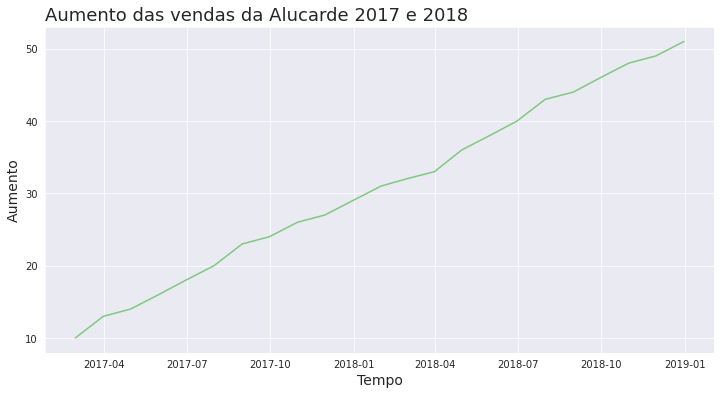

In [13]:
plotar ('Aumento das vendas da Alucarde 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [14]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head() #13 - 10 = 3...
#essa capacidade de deconpor é massa, essas informacoes estava nos dados mas para ter acesso a elas e necessario fazer essa decomposicao, que no caso foi necessario decompor vendas para ter o aumento e depois deconpor novamente so que aumento dessa vez para ter a acelerecao

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


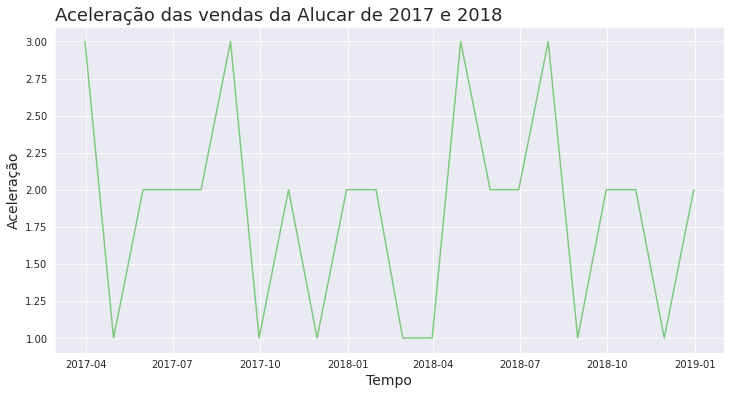

In [15]:
plotar ('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes','aceleracao', alucar)

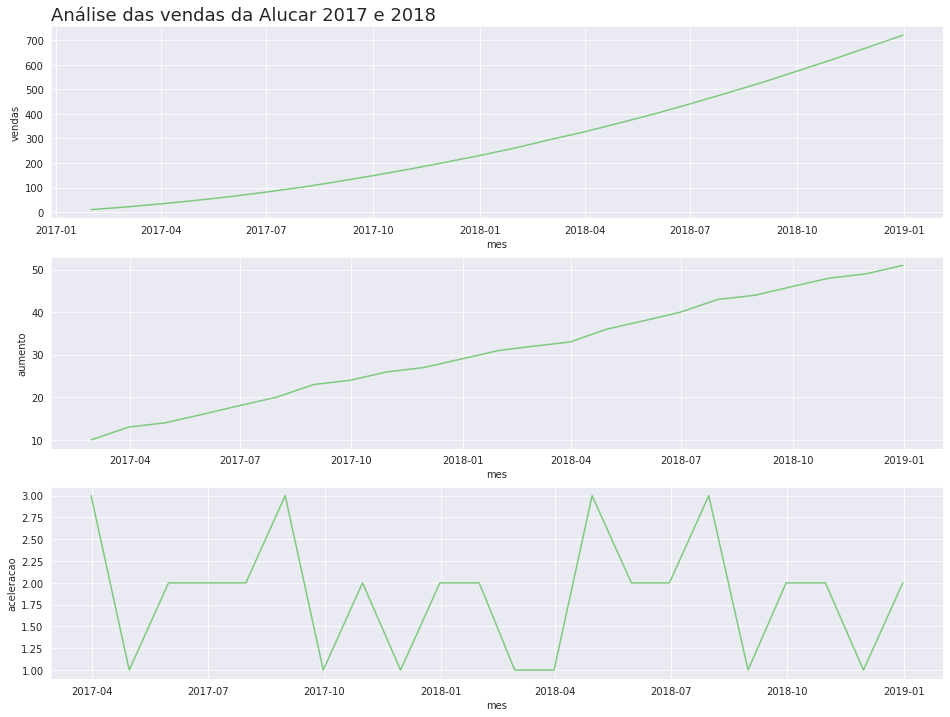

In [16]:
plt.figure(figsize = (16,12)) #criando um espaço para incluir os tres graficos
ax = plt.subplot(3,1,1) #o primeiro e a quantidade de graficos que vai ter 3, depois é para definir se ele vai ocupar todo o espaço sozinho que no caso vai ser 1 se for, e depois é a ordem, se esse em questao vai ser o primeiro ou segundo...
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [17]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

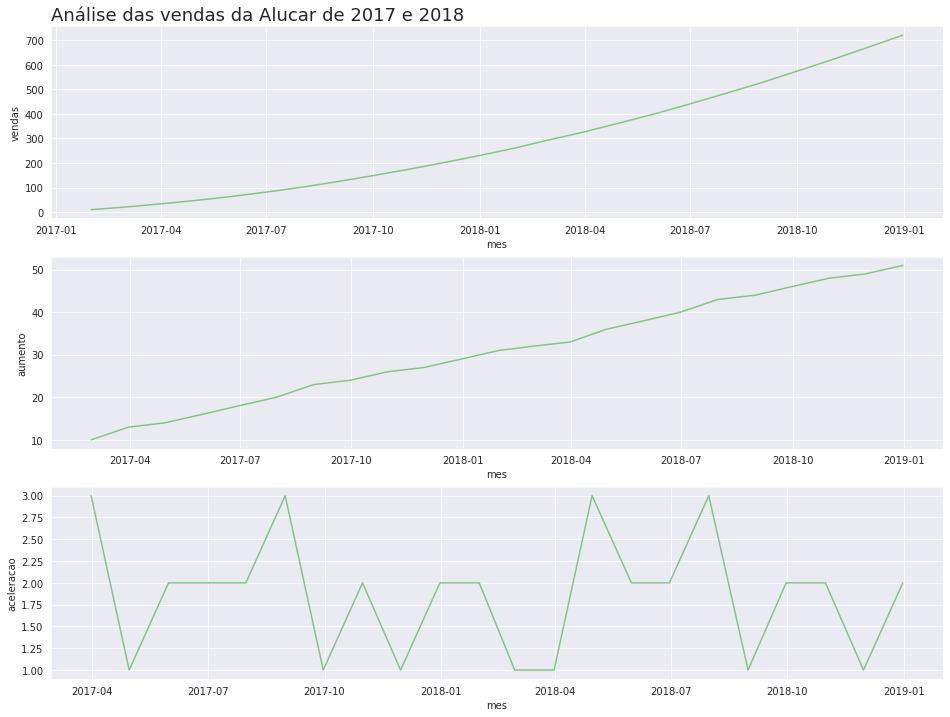

In [18]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018') 

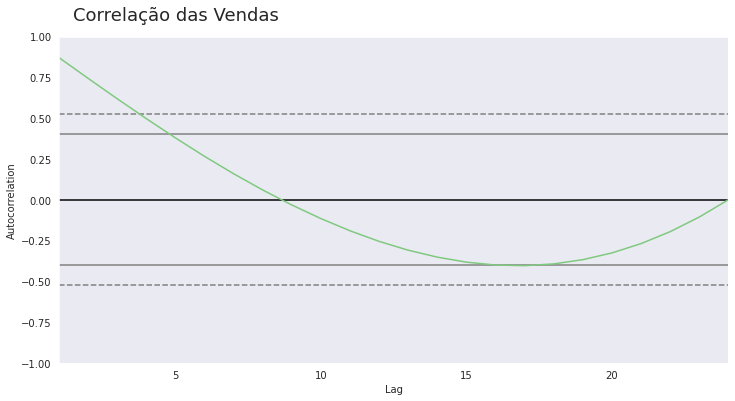

In [19]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.26, y = 0.95) 
autocorrelation_plot(alucar['vendas'])
ax = ax

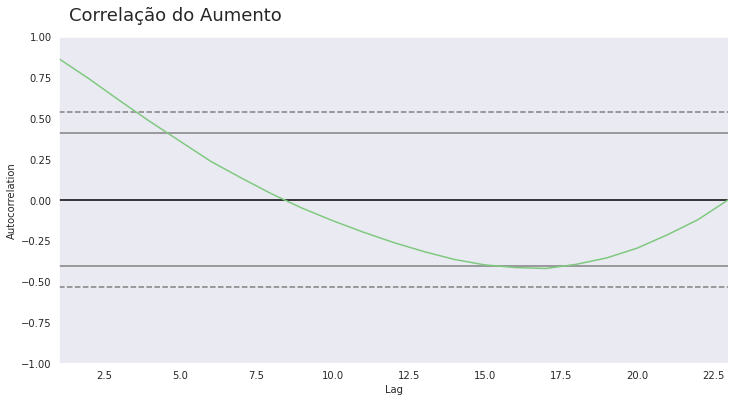

In [20]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x = 0.26, y = 0.95) 
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

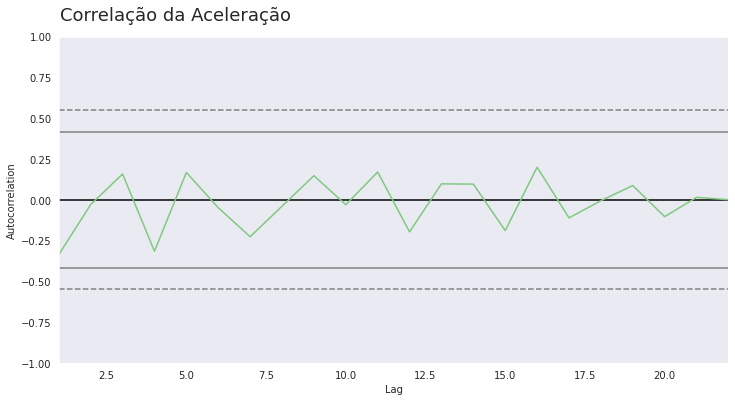

In [21]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da Aceleração', fontsize = 18, x = 0.26, y = 0.95) 
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Decomposição e Sazonalidade

In [22]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [23]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [24]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [25]:
assinantes['aumento'] = assinantes ['assinantes'].diff()
assinantes['aceleracao'] = assinantes ['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


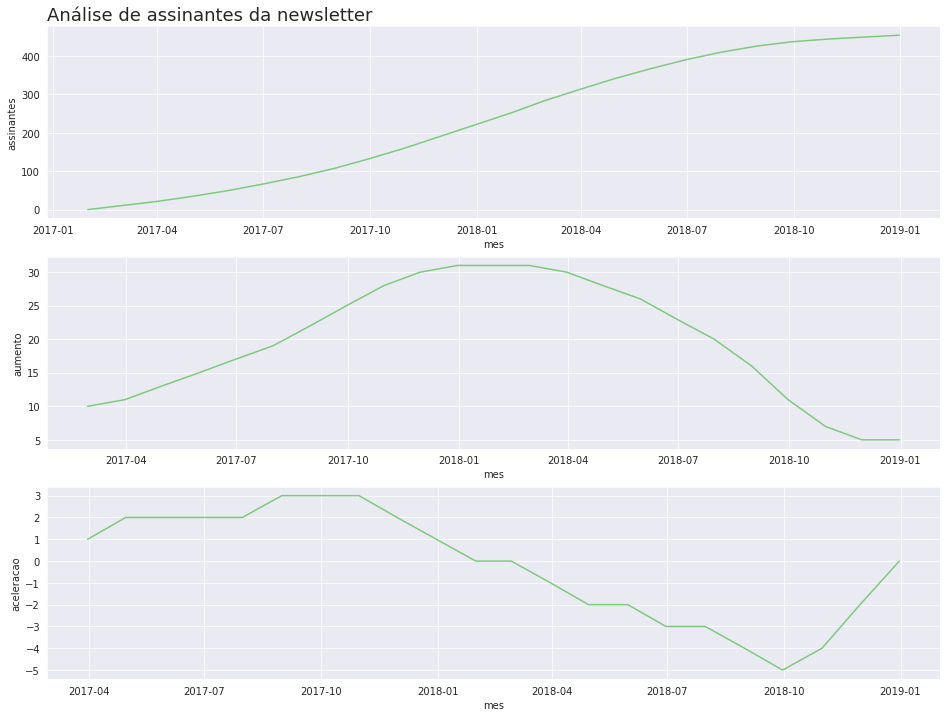

In [26]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

In [27]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [28]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [29]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [30]:
print('quantidade de dados nulos:', chocolura.isna().sum().sum())

quantidade de dados nulos: 0


In [31]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


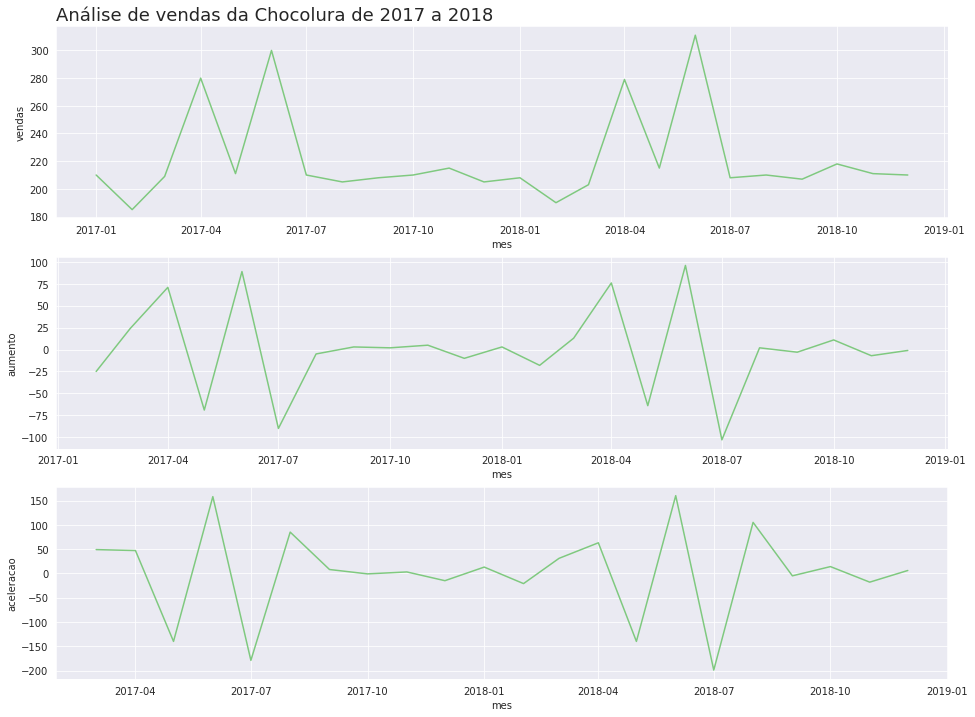

In [32]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

**Podemos ver a sazonalidade nesses graficos, ela é um padrão repetitivo dentro de um determinado período fixo  de tempo, como foi demostrado, vender mais chocolate na pascoa ou nos dias dos namorados.**

In [33]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [34]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [35]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [36]:
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de dados nulos: 0


In [37]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia ['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


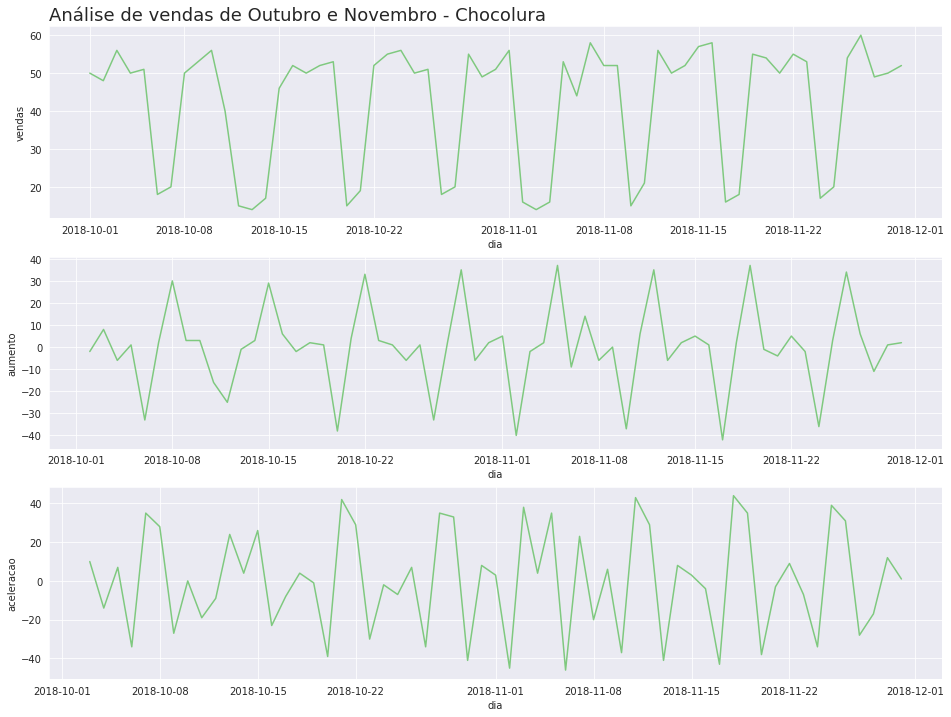

In [38]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia,
                'Análise de vendas de Outubro e Novembro - Chocolura')

**Analisando a sazonalidade**

In [39]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name() # vai pegar os dias da semana
vendas_por_dia

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Monday
57,2018-11-27,60,6.0,-28.0,Tuesday
58,2018-11-28,49,-11.0,-17.0,Wednesday
59,2018-11-29,50,1.0,12.0,Thursday


In [40]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [41]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}

In [42]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [43]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round() #agrupa e tira a media, e usa o round para arredondar o valor
vendas_agrupadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


#Normalização e Statsmodels

**Correlação das Vendas diárias**

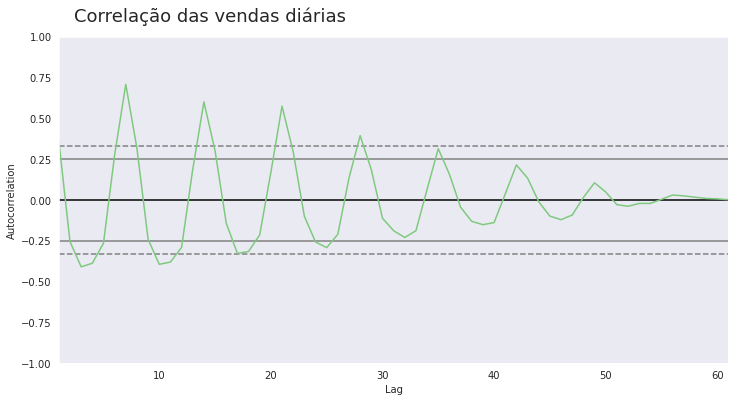

In [44]:
#maior correlacao 1, menor -1
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

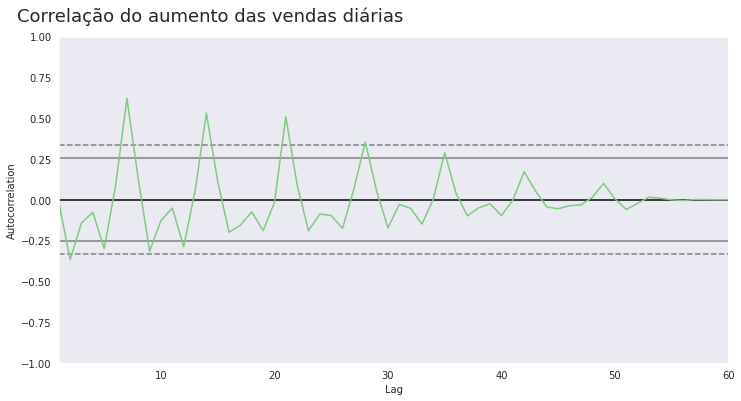

In [45]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

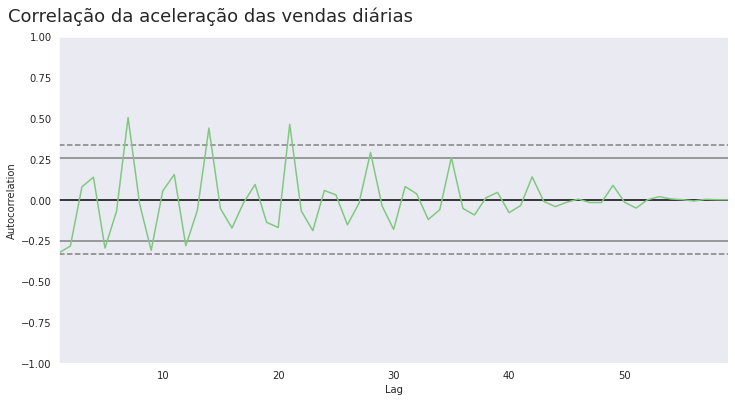

In [46]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

**Normalizar cafelura**

In [47]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [48]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [49]:
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de dados nulos: 0


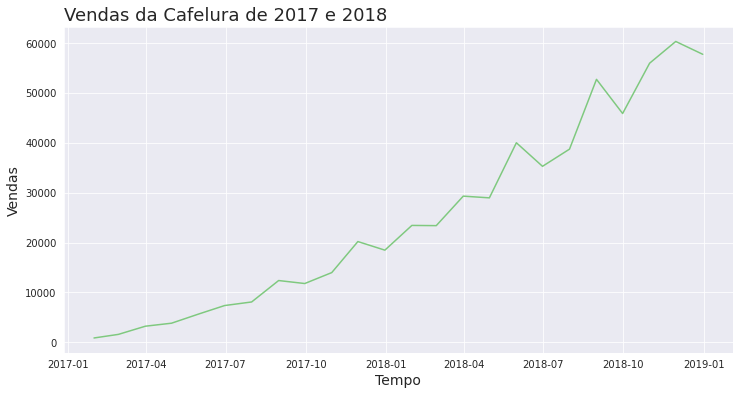

In [50]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [51]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')

In [52]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [53]:
cafelura['vendas_normalizadas']= cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


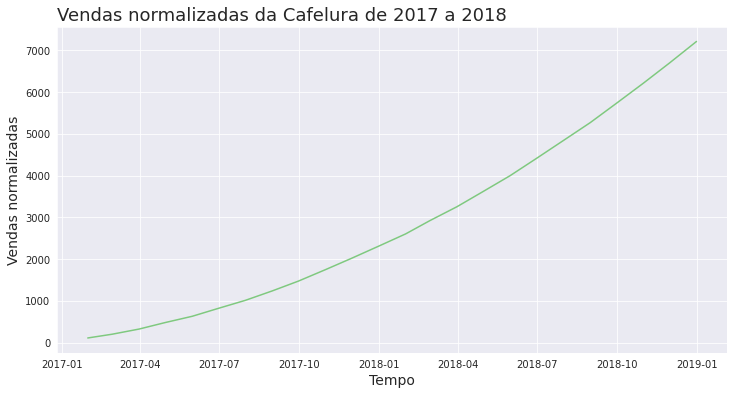

In [54]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

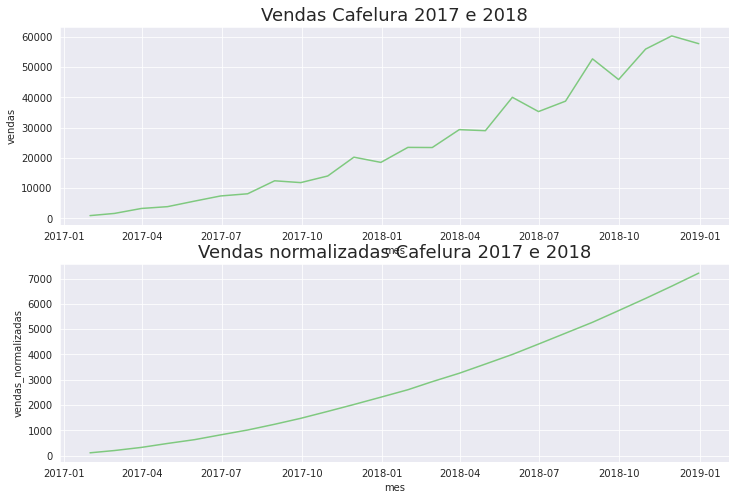

In [55]:
plt.figure(figsize = (12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)
ax = ax 

**Statsmodels**

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

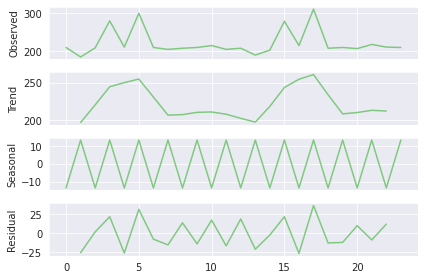

In [57]:
resultado = seasonal_decompose(chocolura['vendas'],  freq = 2)
ax = resultado.plot()

In [58]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [59]:
data = ({
       'observacao': observacao,
       'tendencia': tendencia, 
       'sazonalidade': sazonalidade,
       'ruido': ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,-13.386364,NaN
1,185,197.25,13.386364,-25.636364
2,209,220.75,-13.386364,1.636364
3,280,245.00,13.386364,21.613636
4,211,250.50,-13.386364,-26.113636


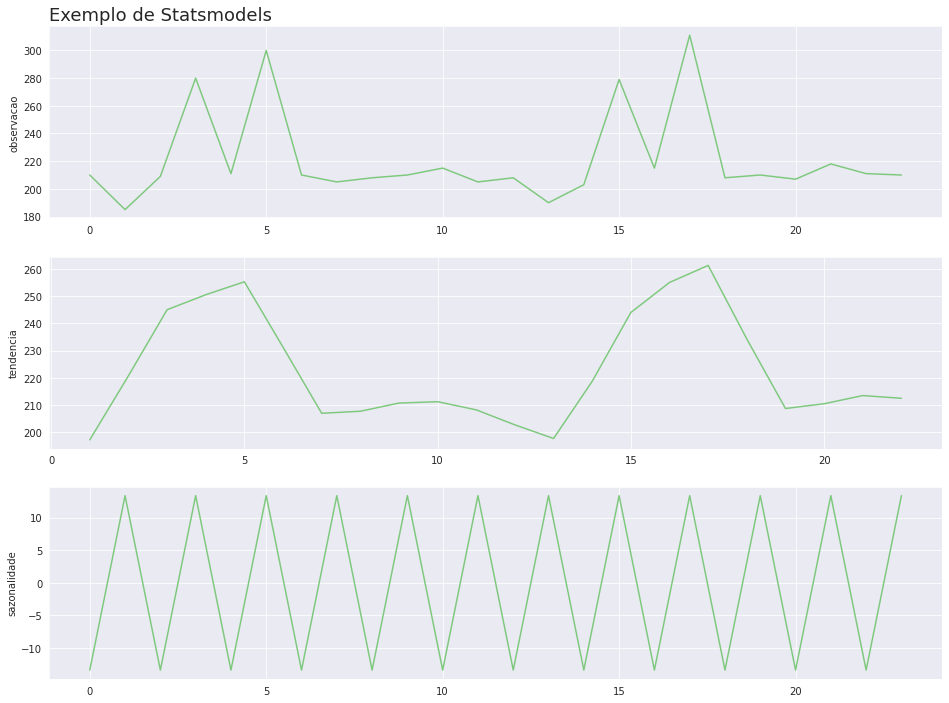

In [60]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

**Ruidos**

In [62]:
alucel = pd.read_csv('alucel.csv')
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [63]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [64]:
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de dados nulos: 0


In [66]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


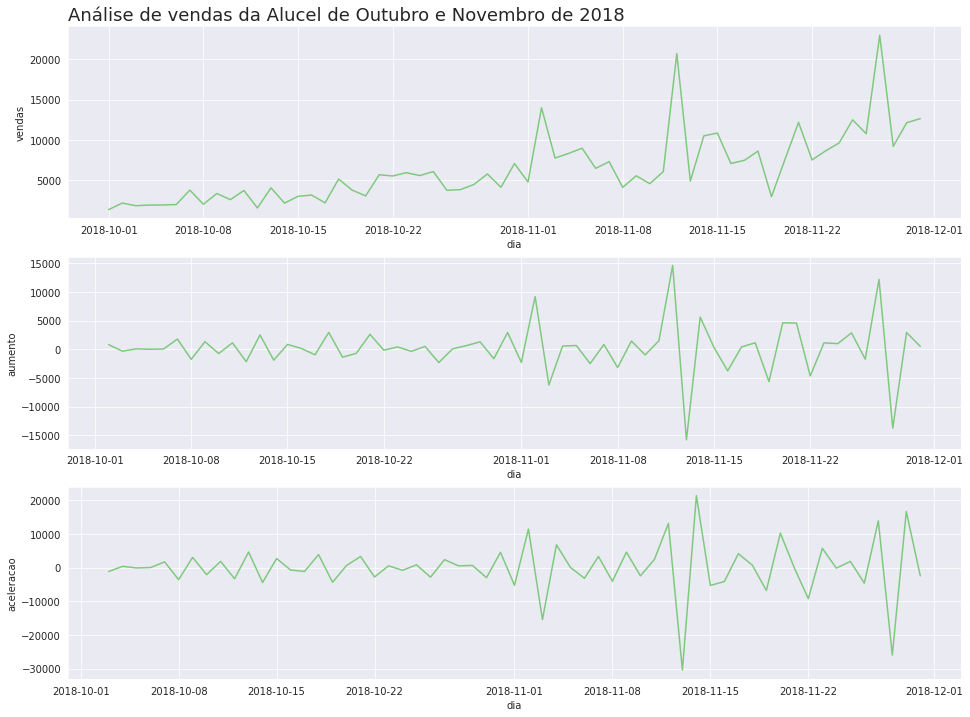

In [67]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel,
                'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**Media Móvel**

In [69]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


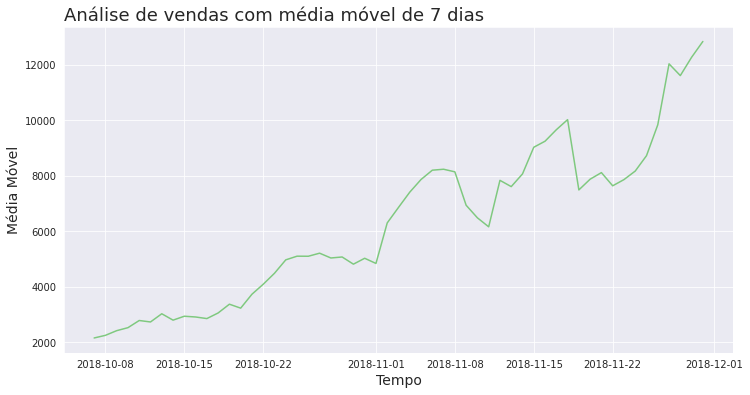

In [70]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [71]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

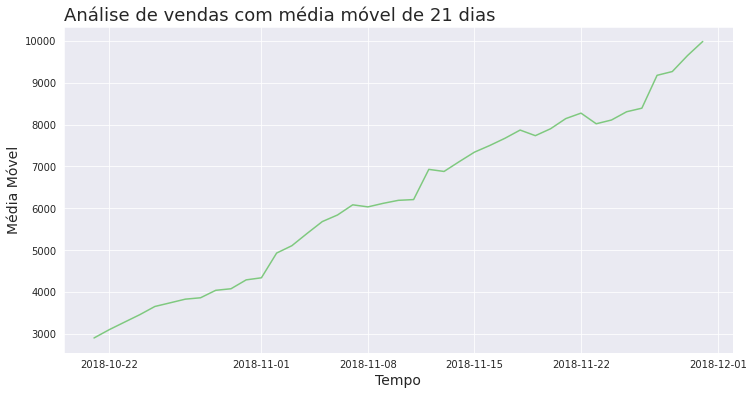

In [72]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

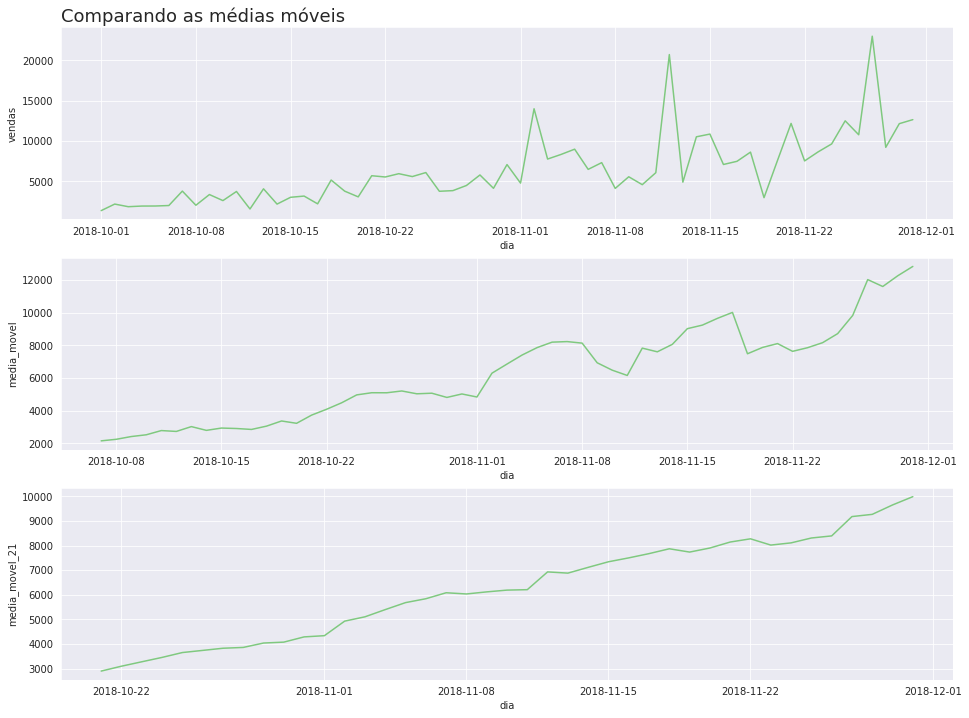

In [74]:
#sempre ter cuidado pq, se fizermos um rolling muito grande, começamos a perder informações, vemos isso ocorrer na media movel de 21 dia
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')